# Exploratory Data Analysis: Movies Dataset

This notebook performs an essential EDA on the `movies-raw.csv` dataset to prepare it for the recommendation engine. We will explore the data structure, missing values, distributions, and key features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

## 1. Load and Inspect Data

In [3]:
df = pd.read_csv("movies-raw.csv")
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (17168, 14)


,id,title,overview,release_date,vote_average,vote_count,popularity,genres,runtime,tagline,director,main_cast,keywords,poster_path
0,43727,Jolene,A teenage orphan spends ten years traveling to...,2010-10-29,6.256,117,3.7161,Drama,121,A life between the exit signs.,Dan Ireland,"Jessica Chastain, Frances Fisher, Rupert Frien...","infidelity, prostitute, hitchhiker, orphan, dr...",/5udqbFUVTzevHpDkel4CElpNEBR.jpg
1,26390,Brooklyn's Finest,Enforcing the law within the notoriously rough...,2010-03-04,6.304,952,3.6838,"Crime, Drama, Thriller",132,This is War. This is Brooklyn.,Antoine Fuqua,"Richard Gere, Don Cheadle, Ethan Hawke, Wesley...","police brutality, husband wife relationship, c...",/9ZyJJpMsc3bF8gduDaxo0zo1gwK.jpg
2,37659,When You're Strange,The creative chemistry of four brilliant artis...,2010-04-09,7.311,220,1.0303,"Documentary, Music",86,A film about The Doors,Tom DiCillo,"Johnny Depp, Jim Morrison, John Densmore, Ray ...","california, poet, trial, rock band, dying youn...",/yd5X8f1mt13ETAWLI7dp0MEEZLL.jpg
3,8952,I Love You Phillip Morris,Steven Russell leads a seemingly average life ...,2010-02-04,6.400,1755,1.6778,"Comedy, Crime, Drama, Romance",98,The Conman who wouldn't go straight.,John Requa,"Jim Carrey, Ewan McGregor, Leslie Mann, Rodrig...","small town, miami, florida, judge, con man, fr...",/qtAuWLGQ7N4PNQ6boZeqqoUY2l9.jpg
4,15004,His Name Was Jason: 30 Years of Friday the 13th,A retrospective documentary about the groundbr...,2010-04-20,6.703,86,0.5094,Documentary,90,NaN,Daniel Farrands,"Diane Almeida, Erich Anderson, Judie Aronson, ...","mass murder, movie business, interview, behind...",/1YyPmtz41mXO0A2ztsn3Ibe6ssF.jpg


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17168 entries, 0 to 17167
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            17168 non-null  int64  
 1   title         17168 non-null  object 
 2   overview      17118 non-null  object 
 3   release_date  17168 non-null  object 
 4   vote_average  17168 non-null  float64
 5   vote_count    17168 non-null  int64  
 6   popularity    17168 non-null  float64
 7   genres        17159 non-null  object 
 8   runtime       17168 non-null  int64  
 9   tagline       9871 non-null   object 
 10  director      17138 non-null  object 
 11  main_cast     17071 non-null  object 
 12  keywords      13905 non-null  object 
 13  poster_path   17161 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 1.8+ MB


## 2. Missing Values Analysis

In [11]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No Missing Values")

             Missing Values  Percentage (%)
tagline                7297       42.503495
keywords               3263       19.006291
main_cast                97        0.565005
overview                 50        0.291240
director                 30        0.174744
genres                    9        0.052423
poster_path               7        0.040774


## 3. Numerical Features Distribution

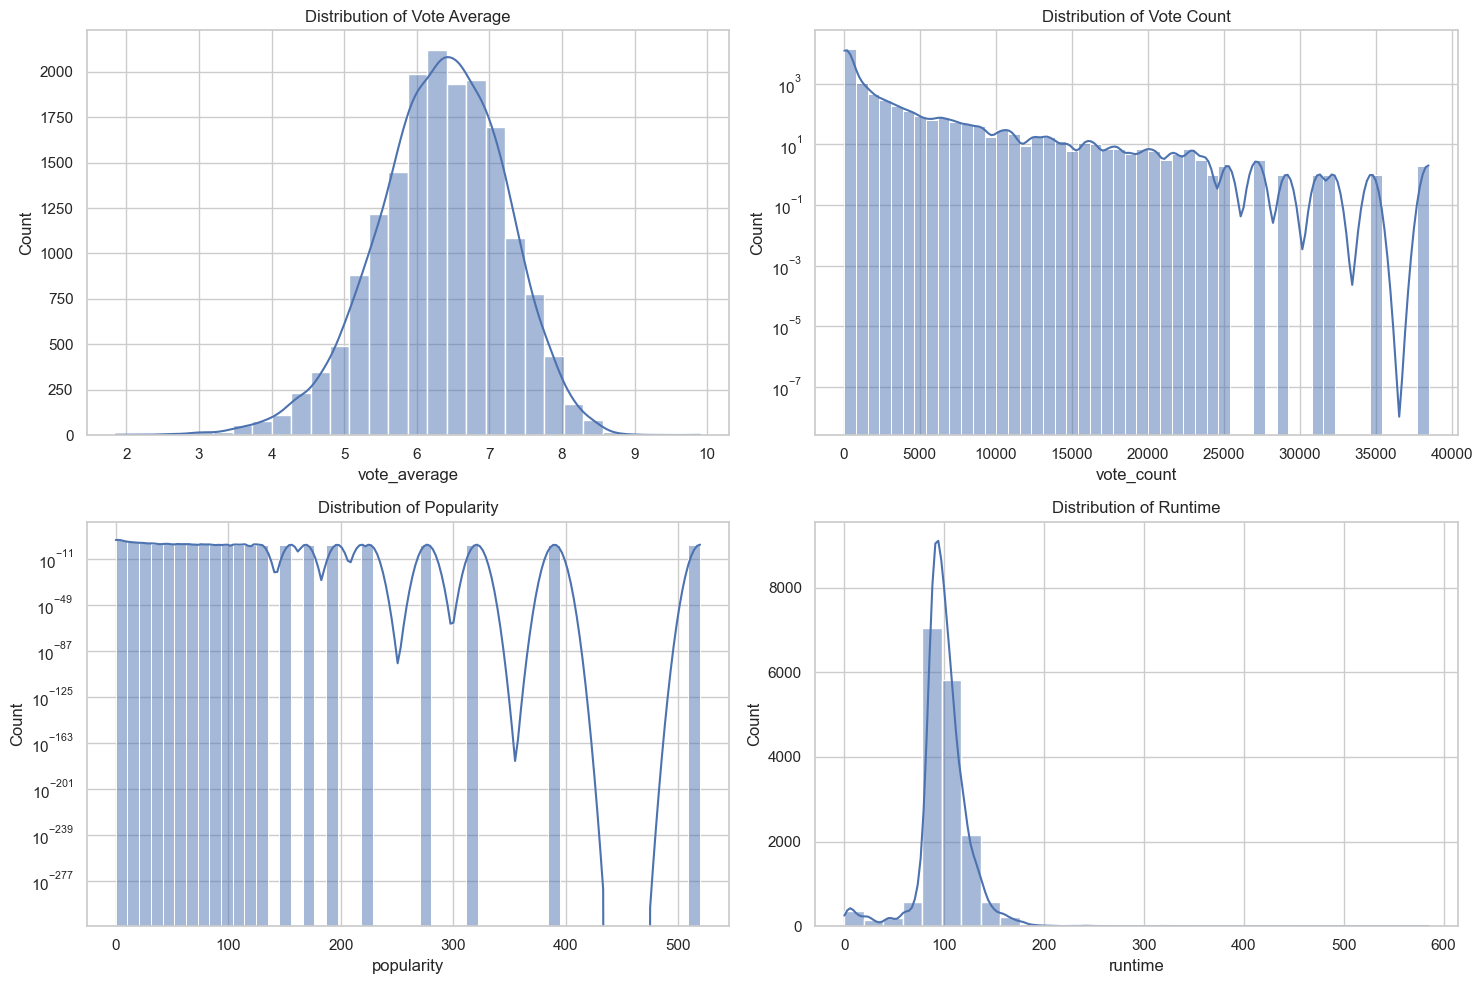

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['vote_average'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Vote Average')

sns.histplot(df['vote_count'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Vote Count')
axes[0, 1].set_yscale('log')

sns.histplot(df['popularity'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Popularity')
axes[1, 0].set_yscale('log')

sns.histplot(df['runtime'].dropna(), bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Runtime')

plt.tight_layout()
plt.show()

## 4. Genre Analysis
Since genres are comma-separated strings, we need to explode them to count occurrences.

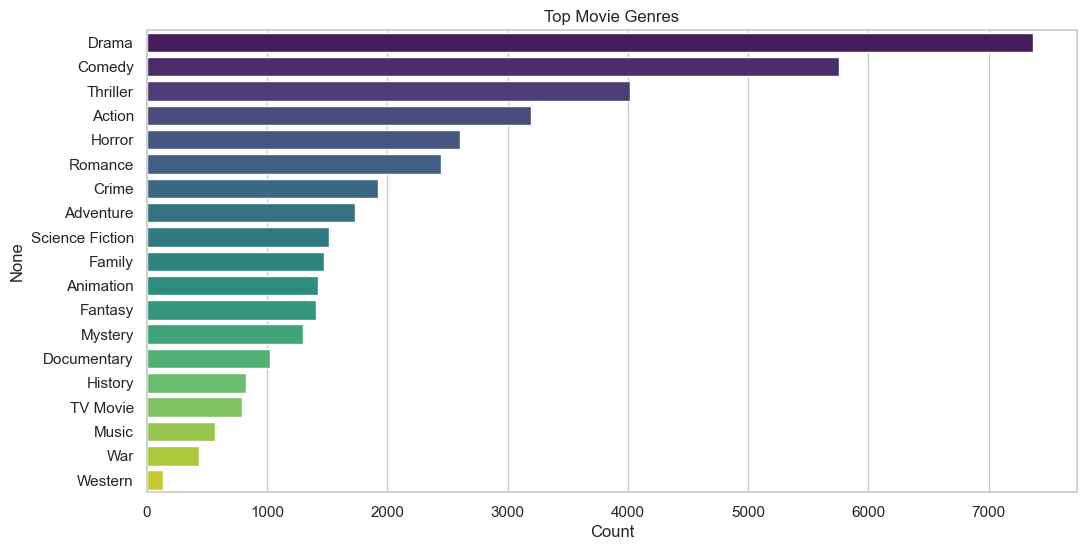

In [7]:
genres_series = df['genres'].dropna().str.split(', ')
all_genres = [genre for sublist in genres_series for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top Movie Genres')
plt.xlabel('Count')
plt.show()

## 5. Temporal Analysis (Release Year)

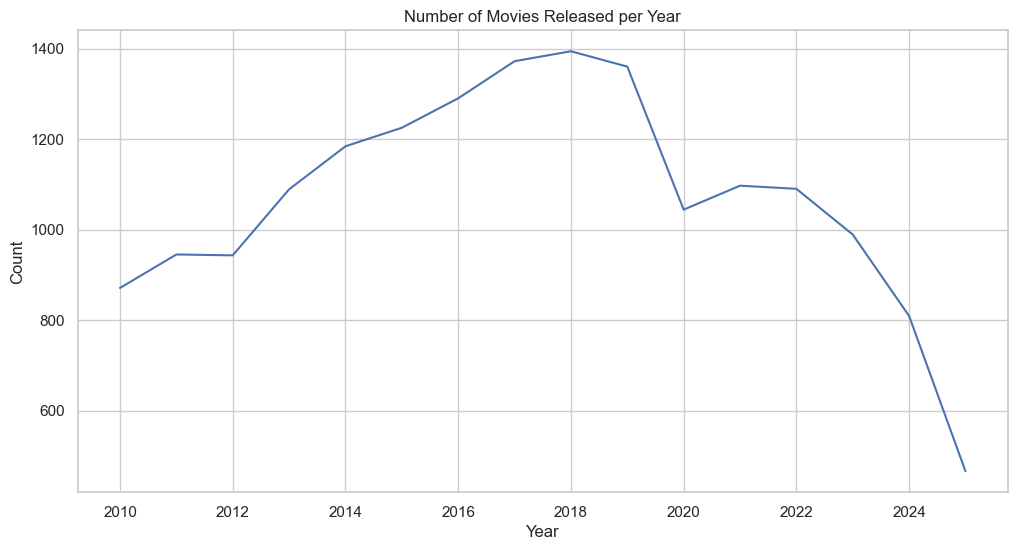

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## 6. Correlation Analysis

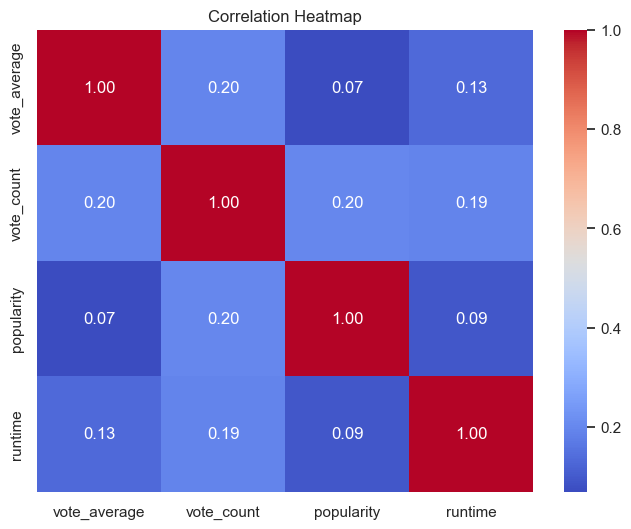

In [9]:
corr_matrix = df[['vote_average', 'vote_count', 'popularity', 'runtime']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 7. Text Features (Overview Length)
The overview is crucial for semantic search. Let's see its length distribution.

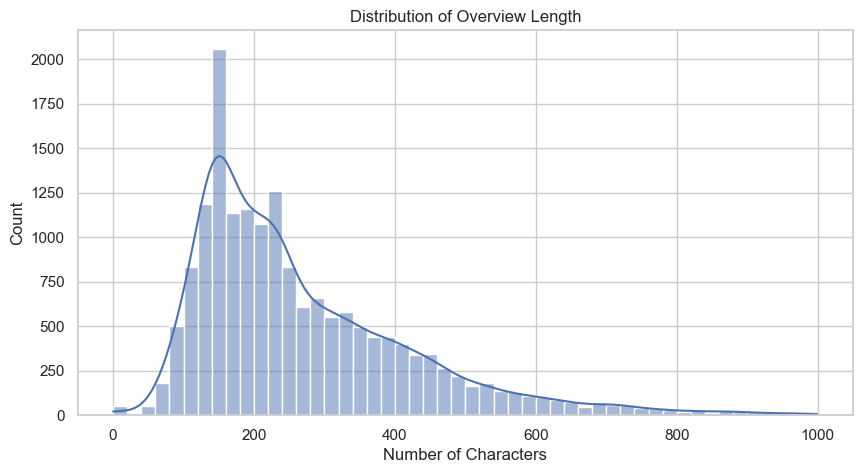

In [10]:
df['overview_len'] = df['overview'].fillna('').apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(df['overview_len'], bins=50, kde=True)
plt.title('Distribution of Overview Length')
plt.xlabel('Number of Characters')
plt.show()